In [1]:
#import urllib2
from io import StringIO
import os
import xmltodict
import pandas as pd
import geopandas as gpd
import windrose

from datetime import datetime 
import statsmodels.api as sm

from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import sys
import requests
import glob

from pyproj import CRS
from pyproj import Transformer
from shapely.geometry import Point

import rasterstats as rs
import rasterio

from rasterio.plot import show
from rasterio.mask import mask
from rasterio.plot import show_hist
from shapely.geometry import box
from rasterstats import zonal_stats
from windrose import WindroseAxes
#import pycrs
#import earthpy as et
#import earthpy.plot as ep

from scipy.optimize import curve_fit

from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl


#import pymannkendall as mk
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10

In [2]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10

from windrose import WindroseAxes
import geopandas as gpd
import windrose
import pandas as pd
import glob
import os

In [11]:
xlfile = r"G:\Shared drives\UGS_Groundwater\Projects\Eddy_Covariance\Data_Downloads\BSF\Bonneville Salt Flats_Flux_AmeriFluxFormat.xlsx"
amflux = pd.read_excel(xlfile,skiprows=[1],index_col=0,parse_dates=True,na_values="NAN")

<AxesSubplot:xlabel='TIMESTAMP'>

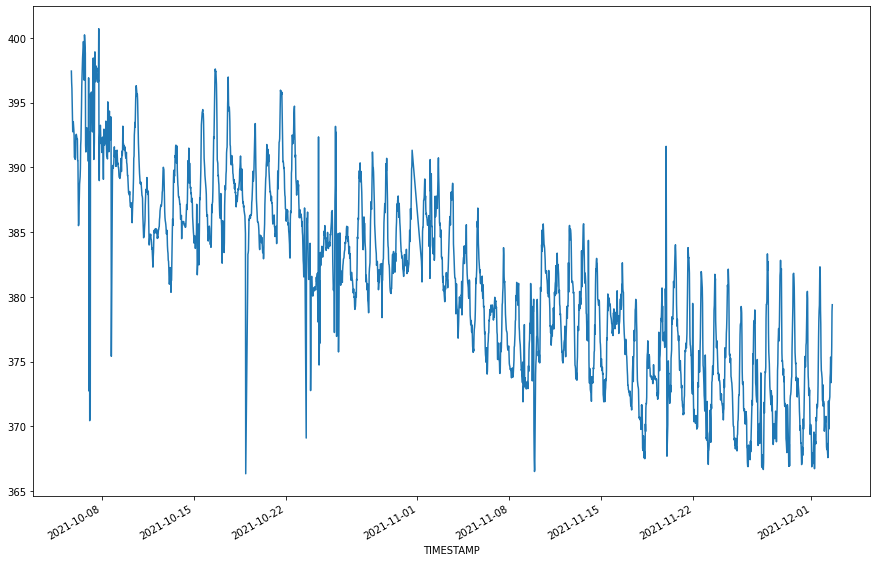

In [15]:
amflux[(amflux['CO2']>366)&(amflux['CO2']<405)]['CO2'].plot()

In [80]:
df = amflux.copy(deep=True)

In [23]:
df

,RECORD,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,...,SWC_1_1_1,ALB,NETRAD,SW_IN,SW_OUT,LW_IN,LW_OUT,P,median,std
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2021-10-09 18:00:00,771.0,202110091730,202110091800,391.5817,0.419681,6.188735,0.377463,0.033206,9.0,24.835810,...,2.331599e+23,25.64921,-19.03805,32.312460,11.815180,341.1217,380.6570,0.0,392.18225,1.823519
2021-10-09 18:30:00,772.0,202110091800,202110091830,391.0998,0.275812,6.191818,0.364741,-0.192373,3.0,24.314370,...,2.332886e+23,0.00000,-43.91919,-0.562264,0.661977,334.8460,377.5409,0.0,392.12935,1.723910
2021-10-09 19:00:00,773.0,202110091830,202110091900,390.8500,0.122690,6.221776,0.413284,-0.064832,9.0,20.257740,...,2.334221e+23,0.00000,-42.18966,-1.529140,0.303868,336.2857,376.6424,0.0,392.12095,1.212059
2021-10-09 19:30:00,774.0,202110091900,202110091930,390.7127,0.117126,6.179188,0.209491,0.001267,1.0,6.823761,...,2.335224e+23,0.00000,-40.08495,-1.481261,0.303668,337.9066,376.2066,0.0,392.12095,1.210667
2021-10-09 20:00:00,775.0,202110091930,202110092000,390.7610,0.102504,6.082535,0.312744,-0.003093,5.0,2.793282,...,2.336023e+23,0.00000,-41.40240,-1.471318,0.298825,336.1140,375.7463,0.0,392.12095,1.138148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02 12:00:00,NaN,202112021130,202112021200,373.3812,0.288864,3.911356,0.074221,-0.182570,7.0,8.111358,...,2.385551e+23,29.37010,215.01130,451.025900,132.457000,245.1798,348.7375,0.0,371.95055,3.107498
2021-12-02 12:30:00,NaN,202112021200,202112021230,374.6856,0.522634,4.066633,0.173577,-0.003067,8.0,4.849146,...,2.381474e+23,27.25348,229.84490,465.516200,126.828800,245.3684,354.2110,0.0,371.98150,3.121514
2021-12-02 13:00:00,NaN,202112021230,202112021300,376.1156,1.104177,4.392253,0.103121,0.115085,7.0,10.684190,...,2.377651e+23,27.42669,218.36250,462.250100,126.713500,245.3537,362.5279,0.0,372.01000,3.164135


In [62]:
roll_avg+2.5*roll_std

TIMESTAMP
2021-10-16 00:30:00    392.157799
2021-10-16 01:00:00    392.157799
2021-10-16 01:30:00    392.157799
2021-10-16 02:00:00    392.157799
2021-10-16 02:30:00    392.157799
                          ...    
2021-12-02 12:00:00    380.189479
2021-12-02 12:30:00    380.290535
2021-12-02 13:00:00    380.482599
2021-12-02 13:30:00    380.922341
2021-12-02 14:00:00    381.309581
Name: CO2, Length: 2007, dtype: float64

In [85]:
df['roll_med']

TIMESTAMP
2021-10-05 16:00:00    392.4446
2021-10-05 16:30:00    392.4446
2021-10-05 17:00:00    392.4446
2021-10-05 17:30:00    392.4446
2021-10-05 18:00:00    392.4446
                         ...   
2021-12-02 12:00:00    372.0100
2021-12-02 12:30:00    372.0100
2021-12-02 13:00:00    372.0100
2021-12-02 13:30:00    372.0100
2021-12-02 14:00:00    372.0100
Name: roll_med, Length: 2748, dtype: float64

Text(0, 0.5, 'CO2 (ppm)')

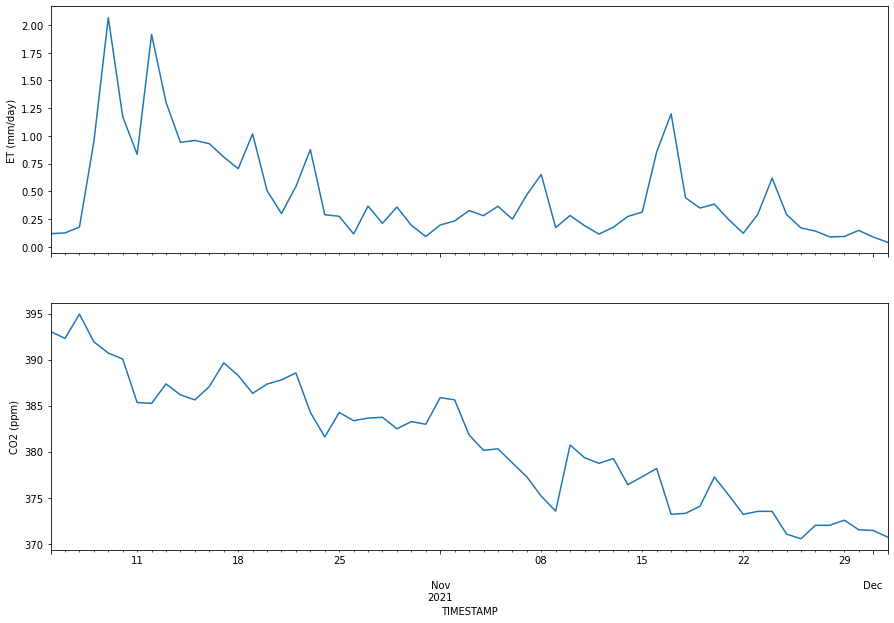

In [114]:
window = 48
devs= 2.0

def filtdf(df, field, window=48, devs=2.0):
    """
    df = dataframe with data
    field = field you want to filter
    window = rolling filter to apply
    devs = std deviations to filter
    
    returns filtered df
    """
    df['roll_top'] = df[field].rolling(window).median().interpolate(method='bfill') + df[field].rolling(window).std().interpolate(method='bfill')*devs
    df['roll_bot'] =  df[field].rolling(window).median().interpolate(method='bfill') - df[field].rolling(window).std().interpolate(method='bfill')*devs

    def noout(x):
        if (x[0] <= x[1]) & (x[0] >= x[2]):
            return x[0]
        else:
            return None


    df[f"{field}_filt"] = df[[field,'roll_top','roll_bot']].apply(lambda x: noout(x),1) 
    df = df.drop(['roll_top','roll_bot'],axis=1)
    return df

df = filtdf(df, 'CO2')
df = filtdf(df, 'ET')
#df['CO2_filt'].plot()
df['ET_filt'] = df['ET_filt'].mask(df['ET_filt'].lt(0))
#(df['ET_filt']*24).plot()

openetfile = r"G:\Shared drives\UGS_Groundwater\Projects\Eddy_Covariance\Data_Downloads\BSF\explore.etdata.org-shape.csv"
openet = pd.read_csv(openetfile, index_col='DateTime',parse_dates=True)

fig, ax = plt.subplots(2,1, sharex=True)


df.resample('1D').sum()['ET_filt'].plot(ax=ax[0])
ax[0].set_ylabel('ET (mm/day)')

df['CO2_filt'].groupby(pd.Grouper(freq='1D')).median().plot(ax=ax[1])
ax[1].set_ylabel('CO2 (ppm)')


<AxesSubplot:xlabel='TIMESTAMP'>

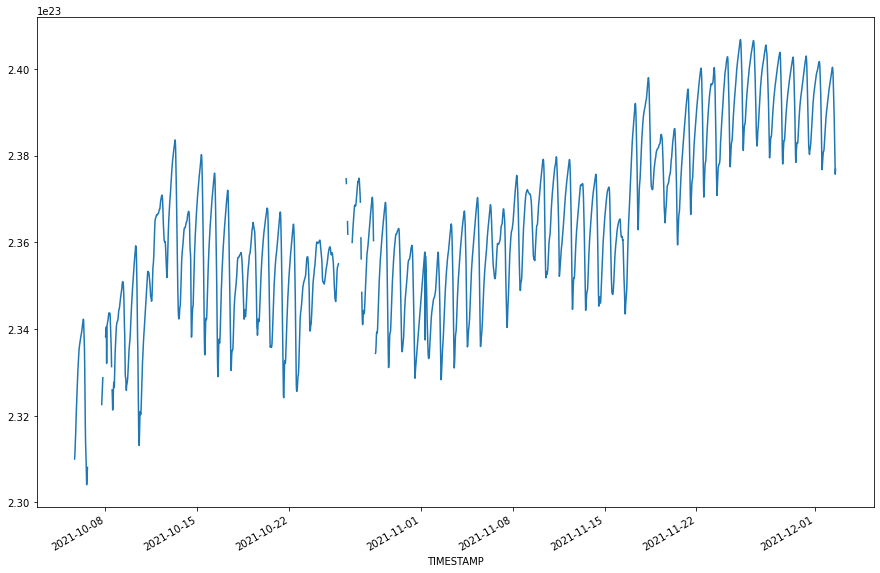

In [119]:
df['SWC_1_1_1'].plot()

<AxesSubplot:xlabel='month'>

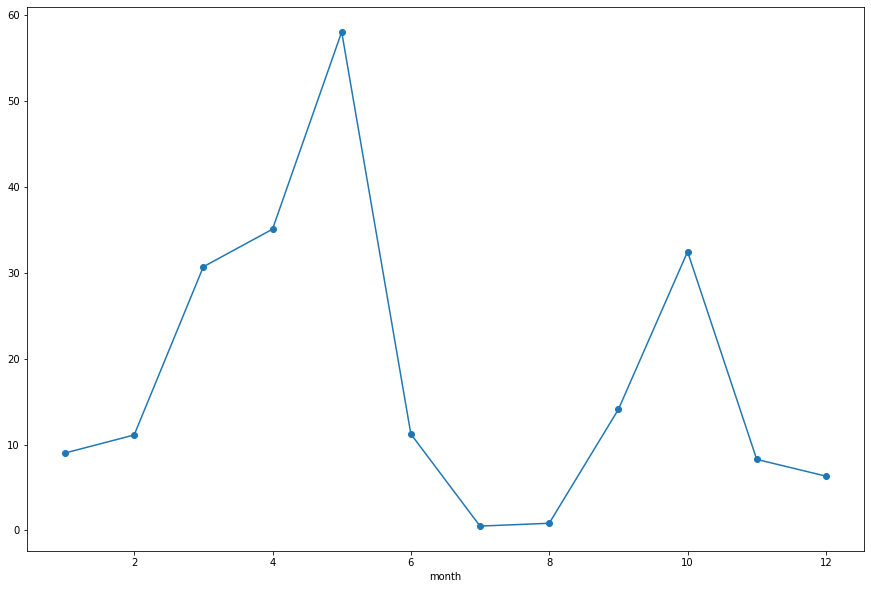

In [105]:
openet['month'] = openet.index.month
openet.groupby('month')['PT-JPL ET'].median().plot(marker='o')

<AxesSubplot:xlabel='TIMESTAMP'>

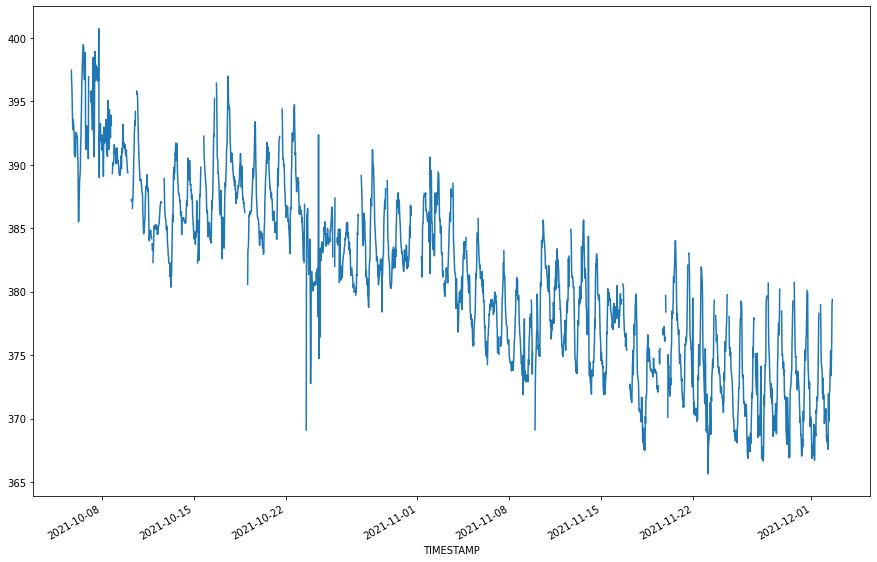

In [89]:
df['CO2_filt'].plot()